In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Load data from CSV files
weil_data = pd.read_csv("../Cornell_Energy_Raw/WeilHall.csv")
weil_data

,name,slottime_GMT,slottype,slotavg,pointTitle
0,WeillHall.CW.FP/TONS,2016-01-01 00:00:00,H,79.207775,Chilled Water
1,WeillHall.Elec.PowerScout3HD/kWsystem,2016-01-01 00:00:00,H,699.500000,Electric
2,WeillHall.STM.M23/MassFlow,2016-01-01 00:00:00,H,3186.771500,Steam Turbine Meter
3,WeillHall.CW.FP/TONS,2016-01-01 01:00:00,H,76.172750,Chilled Water
4,WeillHall.Elec.PowerScout3HD/kWsystem,2016-01-01 01:00:00,H,656.525000,Electric
...,...,...,...,...,...
119963,WeillHall.STM.M23/MassFlow,2019-12-31 22:00:00,H,3120.349750,Steam Turbine Meter
119964,WeillHall.CW.FP/TONS,2019-12-31 23:00:00,H,75.486325,Chilled Water
119965,WeillHall.Elec.PowerScout3HD/kWsystem,2019-12-31 23:00:00,H,715.450000,Electric
119966,WeillHall.STM.Condensate.M22-V/AverageMassFlow,2019-12-31 23:00:00,H,2792.687750,Steam Condensate Meter


In [3]:
filt_chilled_water = weil_data['pointTitle'] == 'Chilled Water'
frame_chilled_water = weil_data[filt_chilled_water]
frame_chilled_water.reset_index(inplace=True)
frame_chilled_water = frame_chilled_water.drop('index', axis=1)
frame_chilled_water['slottime_GMT'] = pd.to_datetime(frame_chilled_water['slottime_GMT'], format='%Y-%m-%d %H:%M:%S')
frame_chilled_water = frame_chilled_water.set_index('slottime_GMT')
frame_chilled_water = frame_chilled_water.reindex(pd.date_range(start='1/1/2016', end='1/1/2020', freq='H'), index='slottime_GMT', fill_value=None)
frame_chilled_water['slotavg'] = frame_chilled_water['slotavg'].interpolate(method="linear")

([<matplotlib.axis.XTick at 0x14ab1dbb0>,
 [Text(16953.0, 0, '2016'),
  Text(17318.0, 0, '2017'),
  Text(17683.0, 0, '2018'),
  Text(18048.0, 0, '2019')])

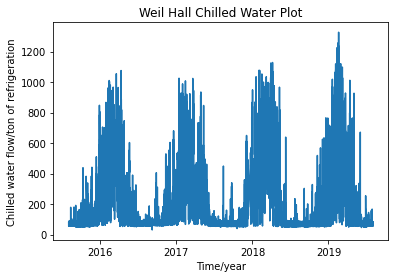

In [4]:
slottime = frame_chilled_water.index
slotavg = frame_chilled_water.slotavg
plt.title('Weil Hall Chilled Water Plot')
plt.xlabel('Time/year')
plt.ylabel('Chilled water flow/ton of refrigeration')
plt.plot(slottime, slotavg)
plt.xticks(ticks=['2016-06-01 00:00:00','2017-06-01 00:00:00','2018-06-01 00:00:00','2019-06-01 00:00:00'], labels=['2016', '2017', '2018', '2019'])

In [5]:
filt_elec = weil_data['pointTitle'] == 'Electric'
frame_elec= weil_data[filt_elec]
frame_elec.reset_index(inplace=True)
frame_elec = frame_elec.drop('index', axis=1)
frame_elec['slottime_GMT'] = pd.to_datetime(frame_elec['slottime_GMT'], format='%Y-%m-%d %H:%M:%S')
frame_elec = frame_elec.set_index('slottime_GMT')
frame_elec = frame_elec.reindex(pd.date_range(start='1/1/2016', end='1/1/2020', freq='H'), index='slottime_GMT', fill_value=None)
frame_elec['slotavg'] = frame_elec['slotavg'].interpolate(method="linear")

([<matplotlib.axis.XTick at 0x14ac7b250>,
 [Text(16953.0, 0, '2016'),
  Text(17318.0, 0, '2017'),
  Text(17683.0, 0, '2018'),
  Text(18048.0, 0, '2019')])

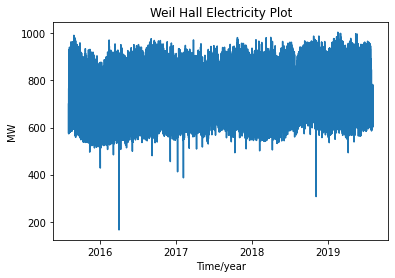

In [6]:
slottime = frame_elec.index
slotavg = frame_elec.slotavg
plt.title('Weil Hall Electricity Plot')
plt.xlabel('Time/year')
plt.ylabel('MW')
plt.plot(slottime, slotavg)
plt.xticks(ticks=['2016-06-01 00:00:00','2017-06-01 00:00:00','2018-06-01 00:00:00','2019-06-01 00:00:00'], labels=['2016', '2017', '2018', '2019'])

In [7]:
filt_steam = weil_data['pointTitle'] == 'Steam Turbine Meter'
frame_steam = weil_data[filt_steam]
frame_steam.reset_index(inplace=True)
frame_steam = frame_steam.drop('index', axis=1)
frame_steam['slottime_GMT'] = pd.to_datetime(frame_steam['slottime_GMT'], format='%Y-%m-%d %H:%M:%S')
frame_steam = frame_steam.set_index('slottime_GMT')
frame_steam = frame_steam.reindex(pd.date_range(start='1/1/2016', end='1/1/2020', freq='H'), index='slottime_GMT', fill_value=None)
frame_steam['slotavg'] = frame_steam['slotavg'].interpolate(method="linear")

([<matplotlib.axis.XTick at 0x14ace1250>,
 [Text(16953.0, 0, '2016'),
  Text(17318.0, 0, '2017'),
  Text(17683.0, 0, '2018'),
  Text(18048.0, 0, '2019')])

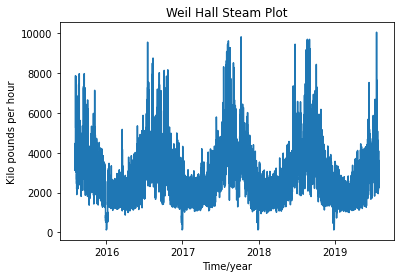

In [8]:
slottime = frame_steam.index
slotavg = frame_steam.slotavg
plt.title('Weil Hall Steam Plot')
plt.xlabel('Time/year')
plt.ylabel('Kilo pounds per hour')
plt.plot(slottime, slotavg)
plt.xticks(ticks=['2016-06-01 00:00:00','2017-06-01 00:00:00','2018-06-01 00:00:00','2019-06-01 00:00:00'], labels=['2016', '2017', '2018', '2019'])

In [9]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
cal = calendar()
holidays = cal.holidays(start=frame_elec.index.min(), end=frame_elec.index.max())

In [10]:
winter_break_16_start = pd.date_range('01/01/2016', '01/25/2016', freq='D')
winter_break_16_end = pd.date_range('12/17/2016', '12/31/2016', freq='D')
winter_break_17_start = pd.date_range('01/01/2017', '01/24/2017', freq='D')
winter_break_17_end = pd.date_range('12/20/2017', '12/31/2017', freq='D')
winter_break_18_start = pd.date_range('01/01/2018', '02/01/2018', freq='D')
winter_break_18_end = pd.date_range('12/20/2018', '12/31/2018', freq='D')
winter_break_19_start = pd.date_range('01/01/2019', '02/01/2019', freq='D')
winter_break_19_end = pd.date_range('12/20/2019', '12/31/2019', freq='D')
winter_breaks = winter_break_16_start.union(winter_break_16_end).union(winter_break_17_start).union(winter_break_18_start).union(winter_break_18_end).union(winter_break_19_start).union(winter_break_19_end)

fall_break_16 = pd.date_range('10/08/2016', '10/11/2016', freq='D')
fall_break_17 = pd.date_range('10/07/2017', '10/10/2017', freq='D')
fall_break_18 = pd.date_range('10/06/2018', '10/09/2018', freq='D')
fall_break_19 = pd.date_range('10/12/2019', '10/15/2019', freq='D')
fall_breaks = fall_break_16.union(fall_break_17).union(fall_break_18).union(fall_break_19)

thx_giving_16 = pd.date_range('11/23/2016', '11/27/2016', freq='D')
thx_giving_17 = pd.date_range('11/22/2017', '11/26/2017', freq='D')
thx_giving_18 = pd.date_range('11/21/2018', '11/25/2018', freq='D')
thx_giving_19 = pd.date_range('11/27/2019', '12/01/2019', freq='D')
thx_givings = thx_giving_16.union(thx_giving_17).union(thx_giving_18).union(thx_giving_19)

feb_break_16 = pd.date_range('02/13/2016', '02/16/2016', freq='D')
feb_break_17 = pd.date_range('02/18/2017', '02/21/2017', freq='D')
feb_break_18 = pd.date_range('02/17/2018', '02/20/2018', freq='D')
feb_break_19 = pd.date_range('02/23/2019', '02/26/2019', freq='D')
feb_breaks = feb_break_16.union(feb_break_17).union(feb_break_18).union(feb_break_19)

sp_break_16 = pd.date_range('03/26/2016', '04/03/2016', freq='D')
sp_break_17 = pd.date_range('04/01/2017', '04/09/2017', freq='D')
sp_break_18 = pd.date_range('03/31/2018', '04/08/2018', freq='D')
sp_break_19 = pd.date_range('03/30/2019', '04/07/2019', freq='D')
sp_breaks = sp_break_16.union(sp_break_17).union(sp_break_18).union(sp_break_19)

In [11]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday, USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

class CornellHolidayCalendar(AbstractHolidayCalendar):
    """
    Cornell University Holiday Calendar based on Cornell University academic calendars
    """
    rules = [fall_breaks, thx_givings, winter_breaks, feb_breaks, sp_breaks]

cornell_holiday_calendar = CustomBusinessDay(holidays=[*sp_breaks, *winter_breaks, *feb_breaks, *fall_breaks, *thx_givings])
cornell_workdays_series = pd.date_range(start="01/01/2016", end="12/31/2019", freq=cornell_holiday_calendar).to_series()
cornell_workdays = cornell_workdays_series.dt.dayofweek

In [12]:
def build_cornell_calendar(input_workdays):
    weekdays = []
    for date in pd.date_range('01/01/2016', '12/31/2019', freq='D'):
        if date not in input_workdays:
            weekdays.append(24*[8])
        else:
            weekdays.append(24*[input_workdays[date]+1])
    return weekdays

cornell_calender = build_cornell_calendar(cornell_workdays)
whole_cornell_calender = flatten_list = [j for sub in cornell_calender for j in sub]

In [13]:
Month = pd.date_range(start='1/1/2016', end='1/1/2020', freq='H').month
Hour = pd.date_range(start='1/1/2016', end='1/1/2020', freq='H').hour

daylight_saving_16 = pd.date_range(start="03/13/2016", end="11/06/2016", freq='D')
daylight_saving_17 = pd.date_range(start="03/12/2017", end="11/05/2017", freq='D')
daylight_saving_18 = pd.date_range(start="03/11/2018", end="11/04/2018", freq='D')
daylight_saving_19 = pd.date_range(start="03/10/2019", end="11/03/2019", freq='D')

year_16 = pd.date_range(start="01/01/2016", end="12/31/2016", freq='D')
year_17 = pd.date_range(start="01/01/2017", end="12/31/2017", freq='D')
year_18 = pd.date_range(start="01/01/2018", end="12/31/2018", freq='D')
year_19 = pd.date_range(start="01/01/2019", end="12/31/2019", freq='D')

In [14]:
def build_daylight_saving_flag(daylight_saving_year, year):
    res = []
    for day in year:
        if day in daylight_saving_year:
            res.append(24*[1])
        else:
            res.append(24*[0])
    return res

daylight_saving_f16 = build_daylight_saving_flag(daylight_saving_16, year_16)
daylight_saving_f17 = build_daylight_saving_flag(daylight_saving_17, year_17)
daylight_saving_f18 = build_daylight_saving_flag(daylight_saving_18, year_18)
daylight_saving_f19 = build_daylight_saving_flag(daylight_saving_19, year_19)

In [15]:
build9_data = pd.read_csv("../Climate_Zone_5/Building_9.csv")
indoor_temp = build9_data['Indoor Temperature [C]']
relative_humidity = build9_data['Indoor Relative Humidity [%]']
avg_unmet_cooling_setpnt_diff = build9_data['Average Unmet Cooling Setpoint Difference [C]']

indoor_temp = np.array(indoor_temp)
relative_humidity = np.array(relative_humidity)
avg_unmet_cooling_setpnt_diff = np.array(avg_unmet_cooling_setpnt_diff)

In [16]:
building_thermal = {'indoor temperature': indoor_temp, 'indoor relative humidity': relative_humidity, 'avg unmet cooling setpnt diff': avg_unmet_cooling_setpnt_diff}
df_build_therm = pd.DataFrame(data=building_thermal, index=pd.date_range(start='1/1/2016', end='2019-12-30 23:00', freq='H'))

new_df_build_therm = df_build_therm.reindex(index=pd.date_range(start='1/1/2016', end='1/1/2020', freq='H'), fill_value=None)
new_df_build_therm = new_df_build_therm.interpolate()

In [17]:
Month = np.array(Month[:-1])
Hour = np.array(Hour[:-1])
Day_Type = pd.Series(whole_cornell_calender)
daylight_saving_f1617 = np.append(daylight_saving_f16, daylight_saving_f17)
daylight_saving_f1819 = np.append(daylight_saving_f18, daylight_saving_f19)
Daylight_Savings_Status = np.append(daylight_saving_f1617, daylight_saving_f1819)
Indoor_Temperature = new_df_build_therm['indoor temperature']
Average_Unmet_Cooling_Setpoint_Difference = new_df_build_therm['avg unmet cooling setpnt diff']
Indoor_Relative_Humidity = new_df_build_therm['indoor relative humidity']
Equipment_Electric_Power = frame_elec.slotavg[:-1]
DHW_Heating = frame_steam.slotavg[:-1]*3.53
Cooling_Load = frame_chilled_water.slotavg[:-1]*3.51685

Weil_DataFrame = {"Month": Month, "Hour": Hour, "Day Type": Day_Type, "Daylight Savings Status": Daylight_Savings_Status, "Indoor Temperature [C]": Indoor_Temperature[:-1].values, "Average Unmet Cooling Setpoint Difference [C]": Average_Unmet_Cooling_Setpoint_Difference[:-1].values, "Indoor Relative Humidity [%]": Indoor_Relative_Humidity[:-1].values, "Equipment Electric Power [kWh]": Equipment_Electric_Power.values, "DHW Heating [kWh]": DHW_Heating.values, "Cooling Load [kWh]": Cooling_Load.values}
Weil_DataFrame = pd.DataFrame(Weil_DataFrame)
Weil_DataFrame.fillna(0.)
Weil_DataFrame.to_csv("processed/WeilHall.csv", index=False)